# Domácí úkol 01

In [1492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
import seaborn as sns

## Předzpracování dat

### Základní informace a načtení dat.

In [1493]:
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")

In [1494]:
display(intakes.info())
outcomes.info()
print("Intakes:")
display(intakes.head())
print("Out")
display(outcomes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167556 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   167554 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167556 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167559 non-null  object
 1   Name              119476 non-null  object
 2   DateTime          167559 non-null  object
 3   MonthYear         167559 non-null  object
 4   Date of Birth     167559 non-null  object
 5   Outcome Type      167515 non-null  object
 6   Outcome Subtype   76968 non-null   object
 7   Animal Type       167559 non-null  object
 8   Sex upon Outcome  167556 non-null  object
 9   Age upon Outcome  167512 non-null  object
 10  Breed             167559 non-null  object
 11  Color             167559 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB
Intakes:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


Out


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


V obou datasetech máme 12 příznáků, které jsou typu object (bude potřeba opravit).

**Intakes**

- Animal ID
  - unikátní identifikátor zvířete
- Name
  - jméno zvířete
- DataTime
  - čas a datum příchodu zvířete do útulku
- MonthYear
  - rok a měsíc příchodu zvířete do útulku
- Found Location
  - Místo nalezení
- Intake Type
  - typ přijetí např. darem, zatoulané atd.
- Intake Condition
  - Stav zvířete při přijetí
- Animal Type
  - typ zvířete např. pes, kočka, dobytek atd.
- Sex upon Intake
  - pohlaví zvířete, a informace o kastraci
- Age upon Intake
  - věk při přijetí
- Breed - plemeno
- Color - barva

**Outcomes**
- Animal ID
  - unikátní identifikátor zvířete
- Name
  - jméno zvířete
- DataTime
  - čas a datum příchodu zvířete do útulku
- MonthYear
  - rok a měsíc příchodu zvířete do útulku
- Date of Birth
- Outcome Type
  - typ odchodu např. adopce, návrat majiteli, přesun jinam, eutanázie atd.
- Outcome Subtype

- Animal Type
  - typ zvířete např. pes, kočka, dobytek atd.
- Sex upon Outcome
  - pohlaví zvířete, a informace kastraci
- Breed - plemeno
- Color - barva

### Intakes
Nejprve se zaměřím na tabulku `intakes`.
Jako první zkusím zjistit jak jsou reprezentovány nedefinované hodnoty v tabulce.
Začnu kategorickými příznaky:

- Intake Type
- Intake Condition
- Animal Type
- Sex upon Intake
- Breed
- Color

In [1495]:
def printUniqueValInCols(categorical_features, df):
    print("Counts of unique values for each feature:")
    for feature in categorical_features:
        print(f"{feature}: {df[feature].nunique(dropna=False)}")
        print(f"{df[feature].unique()}\n")

In [1496]:
categorical_features = [
    "Intake Type",
    "Intake Condition",
    "Animal Type",
    "Sex upon Intake",
    "Breed",
    "Color",
]
printUniqueValInCols(categorical_features, intakes)

Counts of unique values for each feature:
Intake Type: 6
['Stray' 'Public Assist' 'Owner Surrender' 'Abandoned' 'Wildlife'
 'Euthanasia Request']

Intake Condition: 20
['Normal' 'Sick' 'Injured' 'Pregnant' 'Neonatal' 'Nursing' 'Aged'
 'Unknown' 'Med Attn' 'Medical' 'Other' 'Feral' 'Behavior' 'Med Urgent'
 'Parvo' 'Space' 'Agonal' 'Neurologic' 'Panleuk' 'Congenital']

Animal Type: 5
['Dog' 'Cat' 'Other' 'Bird' 'Livestock']

Sex upon Intake: 6
['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]

Breed: 2966
['Beagle Mix' 'English Springer Spaniel' 'Basenji Mix' ... 'Tosa'
 'Toy Poodle/Standard Schnauzer' 'Brittany/Australian Shepherd']

Color: 650
['Tricolor' 'White/Liver' 'Sable/White' 'Calico' 'Orange Tabby' 'Tan/Gray'
 'Chocolate' 'Black' 'Brown Tabby' 'Black/White' 'Cream Tabby' 'White/Tan'
 'Brown/White' 'Brown Tabby/White' 'Brown Brindle/White' 'Torbie'
 'Tan/White' 'Tortie' 'Blue/White' 'White/Brown' 'Brown/Cream' 'Brown'
 'White/Black' 'Blue' 'White' 'B

V tabulce intakes jsou chybějící hodnoty kategorických příznaků označeny jako Unknown.

V příznaku Sex upon Intake se vyskytuje jak hodnota Unknown tak i hodnota NaN.

Abychom zachovali konzistenci v tabulce, převedu všechny hodnoty Unknown v Sex upon Intake na hodnotu NaN => chybějící hodnota. 

Převedu stejným způsobem i v ostatních kategorických příznacích

In [1497]:
for feature in categorical_features:
    print(f"{feature}: {(intakes[feature] == 'Unknown').sum()}")

Intake Type: 0
Intake Condition: 25
Animal Type: 0
Sex upon Intake: 13036
Breed: 3
Color: 1


In [1498]:
def replaceUnknown(columns, df):
    for col in columns:
        df[col].replace("Unknown", np.NAN, inplace=True)

In [1499]:
intakes_cleaned = (
    intakes.copy()
)  # poridim si kopii, abych mel vzdycky k dispozici, orginal/zdroj

replaceUnknown(categorical_features, intakes_cleaned)

for feature in categorical_features:
    print(f"{feature}: {(intakes_cleaned[feature] == 'Unknown').sum()}")

Intake Type: 0
Intake Condition: 0
Animal Type: 0
Sex upon Intake: 0
Breed: 0
Color: 0


In [1500]:
intakes_cleaned[categorical_features] = intakes_cleaned[categorical_features].astype(
    "category"
)
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         167556 non-null  object  
 1   Name              119338 non-null  object  
 2   DateTime          167556 non-null  object  
 3   MonthYear         167556 non-null  object  
 4   Found Location    167556 non-null  object  
 5   Intake Type       167556 non-null  category
 6   Intake Condition  167531 non-null  category
 7   Animal Type       167556 non-null  category
 8   Sex upon Intake   154518 non-null  category
 9   Age upon Intake   167555 non-null  object  
 10  Breed             167553 non-null  category
 11  Color             167555 non-null  category
dtypes: category(6), object(6)
memory usage: 9.1+ MB


**Ošetření číselných a datumových příznaků**

In [1501]:
print(intakes["Age upon Intake"].unique())

['2 years' '8 years' '11 months' '4 weeks' '4 years' '6 years' '6 months'
 '5 months' '1 month' '14 years' '2 weeks' '1 week' '2 months' '18 years'
 '9 years' '4 months' '1 day' '1 year' '3 years' '4 days' '5 years'
 '15 years' '8 months' '6 days' '7 years' '3 months' '3 weeks' '12 years'
 '9 months' '10 years' '10 months' '7 months' '0 years' '1 weeks' '5 days'
 '17 years' '2 days' '11 years' '3 days' '13 years' '5 weeks' '16 years'
 '19 years' '20 years' '-1 years' '-3 years' '22 years' '-4 years'
 '28 years' nan '23 years' '30 years' '-2 years' '21 years' '25 years'
 '24 years']


Z hodnot vidím, že mezi věky se vyskytují i záporná čísla, na ty budu pohlížet jako nedefinované tj. chybějící hodnoty.

In [1502]:
def toDays(ageStr):
    if pd.isna(ageStr):
        return np.NAN
    value, unit = ageStr.split()
    value = int(value)
    if value < 0:
        return np.NAN

    if "year" in unit:
        return value * 365
    elif "month" in unit:
        return value * 30
    elif "week" in unit:
        return value * 7
    elif "day" in unit:
        return value
    else:
        return np.NAN

In [1503]:
intakes_cleaned["Age upon Intake"] = intakes_cleaned["Age upon Intake"].apply(toDays)
print(intakes_cleaned["Age upon Intake"])

0          730.0
1         2920.0
2          330.0
3           28.0
4          730.0
           ...  
167551     730.0
167552    1095.0
167553     730.0
167554    1825.0
167555    1095.0
Name: Age upon Intake, Length: 167556, dtype: float64


**Převedení typu příznaku DateTime na datetime64**

In [1504]:
intakes_cleaned["DateTime"] = pd.to_datetime(intakes["DateTime"])
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167556 non-null  object        
 1   Name              119338 non-null  object        
 2   DateTime          167556 non-null  datetime64[ns]
 3   MonthYear         167556 non-null  object        
 4   Found Location    167556 non-null  object        
 5   Intake Type       167556 non-null  category      
 6   Intake Condition  167531 non-null  category      
 7   Animal Type       167556 non-null  category      
 8   Sex upon Intake   154518 non-null  category      
 9   Age upon Intake   167546 non-null  float64       
 10  Breed             167553 non-null  category      
 11  Color             167555 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(4)
memory usage: 9.1+ MB


**Další úpravy**

Smažu sloupec MonthYear, redundantní data. Název měsíce a rok přijmu do útulku je obsažen ve sloupci DateTime. 

Poté odstraním duplicitní záznamy. 

Na závěr rozdělím sloupec Sex upon Intake, na sloupce Sex a Sterilization. Takhle odělím informaci o kastraci od pohlaví. 

Pokud je příznak NaN, tak v obou nových sloupcích bude také NaN.

In [1505]:
# smazání sloupce
intakes_cleaned = intakes_cleaned.drop("MonthYear", axis=1)
# odstranění duplicitních záznamů
intakes_cleaned = intakes_cleaned.drop_duplicates()
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167524 entries, 0 to 167555
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167524 non-null  object        
 1   Name              119311 non-null  object        
 2   DateTime          167524 non-null  datetime64[ns]
 3   Found Location    167524 non-null  object        
 4   Intake Type       167524 non-null  category      
 5   Intake Condition  167499 non-null  category      
 6   Animal Type       167524 non-null  category      
 7   Sex upon Intake   154490 non-null  category      
 8   Age upon Intake   167514 non-null  float64       
 9   Breed             167521 non-null  category      
 10  Color             167523 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(3)
memory usage: 9.1+ MB


In [1506]:
# rozdělení sloupce Sex upon Intake
def get_castr(status):
    if "Spayed" in status or "Neutered" in status:
        return "Sterilized"
    elif "Intact" in status:
        return "Intact"
    else:
        return np.nan


def get_sex(sex):
    if "Male" in sex:
        return "Male"
    elif "Female" in sex:
        return "Female"
    else:
        return np.nan


intakes_cleaned["Sterilization"] = (
    intakes_cleaned["Sex upon Intake"].apply(get_castr).astype("category")
)
intakes_cleaned["Sex"] = (
    intakes_cleaned["Sex upon Intake"].apply(get_sex).astype("category")
)
intakes_cleaned = intakes_cleaned.drop("Sex upon Intake", axis=1)
intakes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167524 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167524 non-null  object        
 1   Name              119311 non-null  object        
 2   DateTime          167524 non-null  datetime64[ns]
 3   Found Location    167524 non-null  object        
 4   Intake Type       167524 non-null  category      
 5   Intake Condition  167499 non-null  category      
 6   Animal Type       167524 non-null  category      
 7   Age upon Intake   167514 non-null  float64       
 8   Breed             167521 non-null  category      
 9   Color             167523 non-null  category      
 10  Sterilization     154490 non-null  category      
 11  Sex               154490 non-null  category      
dtypes: category(7), datetime64[ns](1), float64(1), object(3)
memory usage: 9.2+ MB


Jako poslední část vizualizuji distribuci chybějících dat v Intakes.

In [1507]:
def missingValuesGraph(df, name):
    fig, ax = plt.subplots(figsize=(16, 6))
    cmap = colors.ListedColormap(["darkslategrey", "white"])
    ax.imshow(
        df.isna(),
        aspect="auto",
        cmap=cmap,
        interpolation="none",
        vmin=0,
        vmax=1,
    )
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows Index")

    num_columns = len(df.columns)

    ax.set_xticks(np.arange(num_columns))
    ax.tick_params(axis="x", which="major", length=0)
    ax.set_xticklabels(df.columns, rotation=45, ha="right")

    ax.set_xticks(np.arange(0.5, num_columns + 0.5, 1), minor=True)

    legend_elements = [
        Patch(facecolor="darkslategrey", edgecolor="black", label="Present Value"),
        Patch(facecolor="white", edgecolor="black", label="Missing Value"),
    ]

    ax.legend(
        handles=legend_elements,
        loc="upper right",
        bbox_to_anchor=(1.05, -0.1),
        borderaxespad=0.0,
    )

    ax.grid(
        which="minor",
        visible=True,
        axis="x",
        color="white",
        linestyle="-",
        linewidth=1.0,
    )
    ax.grid(
        which="major",
        visible=False,
        axis="x",
    )

    ax.grid(
        which="major",
        visible=False,
        axis="y",
    )

    ax.set_yticks(range(0, len(df), max(1, len(df) // 5)))
    ax.set_title(f"Missing Values in {name}")

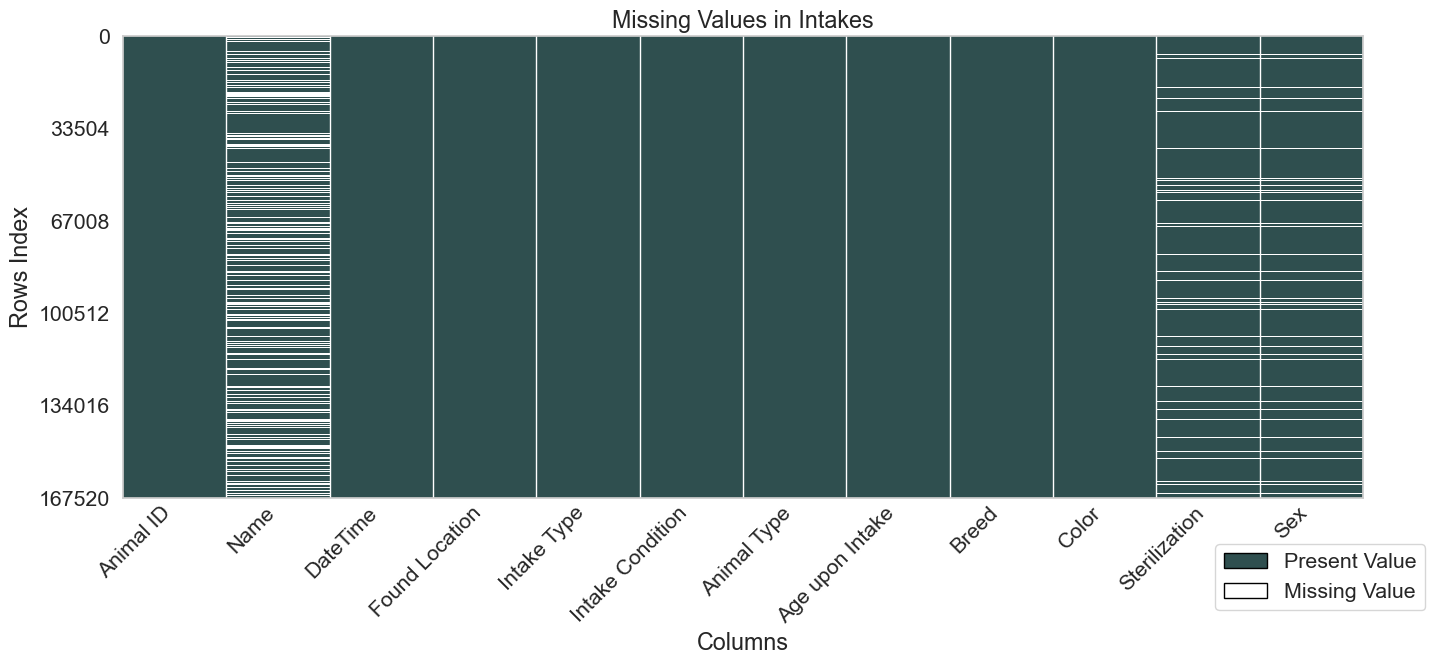

In [1508]:
missingValuesGraph(intakes_cleaned, "Intakes")

### Outcomes

Nyní předzpracuji data v tabulce outcomes. Provedu podobné kroky jako při zpracování intakes.

In [1509]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [1510]:
categorical_features = [
    "Outcome Type",
    "Outcome Subtype",
    "Animal Type",
    "Sex upon Outcome",
    "Breed",
    "Color",
]
printUniqueValInCols(categorical_features, outcomes)

Counts of unique values for each feature:
Outcome Type: 12
['Adoption' 'Rto-Adopt' 'Euthanasia' 'Transfer' 'Return to Owner' 'Died'
 'Disposal' 'Missing' nan 'Relocate' 'Stolen' 'Lost']

Outcome Subtype: 27
[nan 'Partner' 'Foster' 'Snr' 'SCRP' 'Out State' 'Suffering' 'At Vet'
 'Underage' 'Rabies Risk' 'In Kennel' 'Offsite' 'Aggressive' 'Field'
 'Emergency' 'Enroute' 'In Foster' 'Behavior' 'Medical'
 'Court/Investigation' 'Possible Theft' 'Barn' 'Customer S' 'In State'
 'Emer' 'In Surgery' 'Prc']

Animal Type: 5
['Cat' 'Dog' 'Other' 'Bird' 'Livestock']

Sex upon Outcome: 6
['Neutered Male' 'Unknown' 'Intact Male' 'Spayed Female' 'Intact Female'
 nan]

Breed: 2964
['Domestic Shorthair Mix' 'Chihuahua Shorthair Mix' 'Raccoon' ...
 'Lhasa Apso/Standard Poodle' 'Dachshund Wirehair/Bruss Griffon'
 'Miniature Schnauzer/Beagle']

Color: 653
['Black/White' 'Brown Tabby/White' 'White/Brown' 'Gray' 'Buff'
 'Orange Tabby' 'Brown' 'Blue Tabby' 'Brown Tabby' 'Black'
 'White/Orange Tabby' 'Blue/White

In [1511]:
print("nan counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes[feature].isna()).sum()}")

print("\nUnknown counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes[feature] == 'Unknown').sum()}")

nan counts: 
Outcome Type: 44
Outcome Subtype: 90591
Animal Type: 0
Sex upon Outcome: 3
Breed: 0
Color: 0

Unknown counts: 
Outcome Type: 0
Outcome Subtype: 0
Animal Type: 0
Sex upon Outcome: 13001
Breed: 3
Color: 1


Podobně jako v intakes, Sex upon Outcome obsahuje jak hodnoty "Unknown", tak i hodnoty nan, Breed a Color také obsahují Unknown. Převedu tedy, všechny výskyty Unknown v těchto sloupcích na NaN. 

In [1512]:
outcomes_cleaned = outcomes.copy()
replaceUnknown(categorical_features, outcomes_cleaned)

In [1513]:
print("nan counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes_cleaned[feature].isna()).sum()}")

print("\nUnknown counts: ")
for feature in categorical_features:
    print(f"{feature}: {(outcomes_cleaned[feature] == 'Unknown').sum()}")

nan counts: 
Outcome Type: 44
Outcome Subtype: 90591
Animal Type: 0
Sex upon Outcome: 13004
Breed: 3
Color: 1

Unknown counts: 
Outcome Type: 0
Outcome Subtype: 0
Animal Type: 0
Sex upon Outcome: 0
Breed: 0
Color: 0


In [1514]:
outcomes_cleaned[categorical_features] = outcomes_cleaned[categorical_features].astype(
    "category"
)

In [1515]:
outcomes_cleaned["Age upon Outcome"].unique()

array(['3 months', '2 years', '1 year', '4 months', '6 days', '7 years',
       '2 months', '3 years', '2 days', '3 weeks', '11 years', '9 months',
       '4 weeks', '2 weeks', '6 months', '9 years', '10 years', '1 month',
       '8 years', '7 months', '6 years', '4 years', '12 years', '5 years',
       '1 day', '1 weeks', '5 months', '5 days', '15 years', '10 months',
       '4 days', '16 years', '8 months', nan, '13 years', '1 week',
       '14 years', '11 months', '3 days', '0 years', '5 weeks',
       '17 years', '18 years', '20 years', '22 years', '-2 years',
       '19 years', '28 years', '-3 years', '23 years', '25 years',
       '30 years', '-1 years', '24 years', '21 years', '-4 years'],
      dtype=object)

Stejný problém jako v intakes. Vyřeším analogicky.

In [1516]:
outcomes_cleaned["Age upon Outcome"] = outcomes_cleaned["Age upon Outcome"].apply(
    toDays
)

**Převedení příznaku DateTime na typ datetime64**

In [1517]:
outcomes_cleaned["DateTime"] = pd.to_datetime(outcomes["DateTime"])

**Další úpravy**

Smažu sloupec MonthYear, redundantní data. Název měsíce a rok odchodu z útulku je obsažen ve sloupci DateTime. 

Poté odstraním duplicitní záznamy.

Na závěr rozdělím sloupec Sex upon Outcome, na sloupce Sex a Sterilization. Takhle odělím informaci o kastraci od pohlaví. 

Pokud je příznak NaN, tak v obou nových sloupcích bude také NaN.

In [1518]:
outcomes_cleaned = outcomes_cleaned.drop("MonthYear", axis=1)
outcomes_cleaned = outcomes_cleaned.drop_duplicates()
outcomes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   Date of Birth     167535 non-null  object        
 4   Outcome Type      167491 non-null  category      
 5   Outcome Subtype   76957 non-null   category      
 6   Animal Type       167535 non-null  category      
 7   Sex upon Outcome  154532 non-null  category      
 8   Age upon Outcome  167479 non-null  float64       
 9   Breed             167532 non-null  category      
 10  Color             167534 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(3)
memory usage: 9.1+ MB


In [1519]:
# rozdělení sloupce Sex upon Outcome
outcomes_cleaned["Sterilization"] = (
    outcomes_cleaned["Sex upon Outcome"].apply(get_castr).astype("category")
)
outcomes_cleaned["Sex"] = (
    outcomes_cleaned["Sex upon Outcome"].apply(get_sex).astype("category")
)
outcomes_cleaned = outcomes_cleaned.drop("Sex upon Outcome", axis=1)
outcomes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   Date of Birth     167535 non-null  object        
 4   Outcome Type      167491 non-null  category      
 5   Outcome Subtype   76957 non-null   category      
 6   Animal Type       167535 non-null  category      
 7   Age upon Outcome  167479 non-null  float64       
 8   Breed             167532 non-null  category      
 9   Color             167534 non-null  category      
 10  Sterilization     154532 non-null  category      
 11  Sex               154532 non-null  category      
dtypes: category(7), datetime64[ns](1), float64(1), object(3)
memory usage: 9.2+ MB


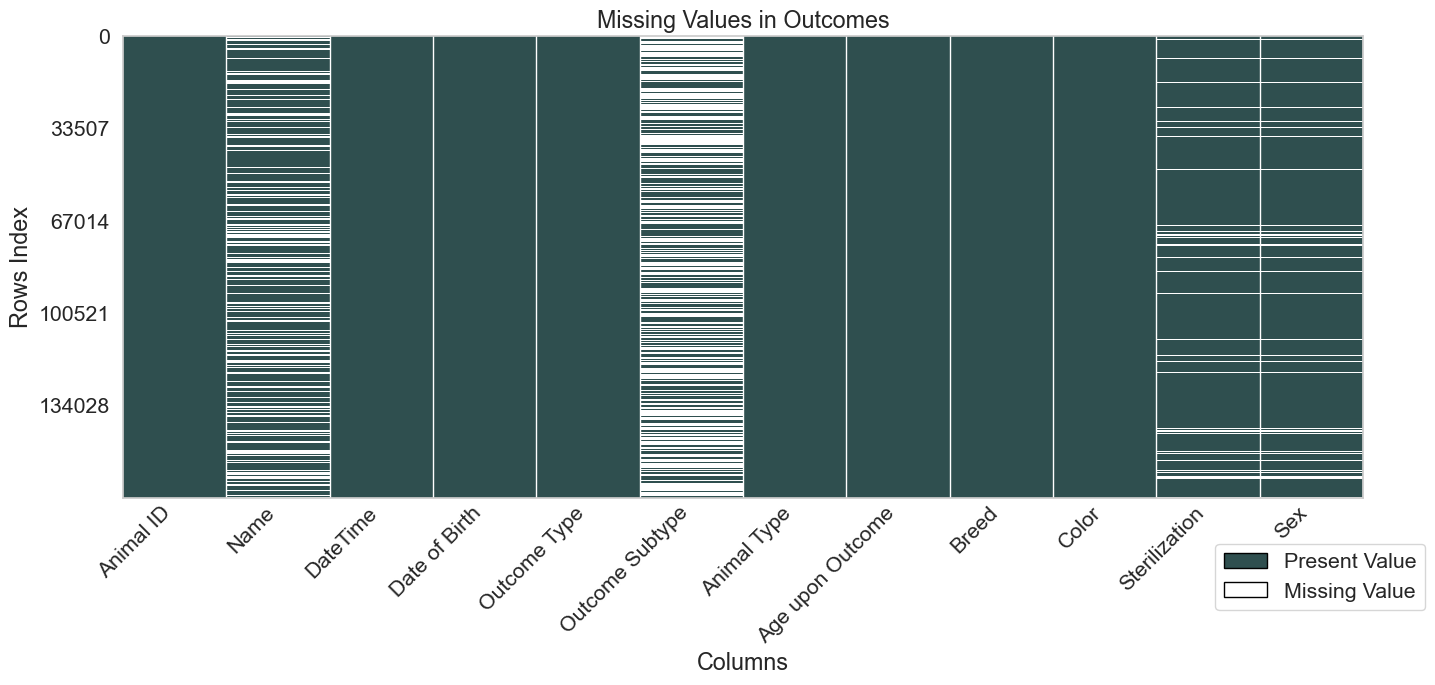

In [1520]:
missingValuesGraph(outcomes_cleaned, "Outcomes")  # chybejici hodnoty v outcomes

Můžeme si všimnout, že příznak Outcome Subtype obsahuje hodně chybějících dat. Stojí za zvážení, jestli ho celý nezrušit.

In [1521]:
intakes = intakes_cleaned
outcomes = outcomes_cleaned

## Deskriptivní statistiky


### Age upon Intake a DateTime

Jako první popíšu příznak Age upon Intake. Vypíšu základní statistiky.

In [1522]:
def display_stats(df, col):
    stats_df = pd.DataFrame(
        np.array(
            [
                ["Minimal value", df[col].min()],
                ["Maximal value", df[col].max()],
                ["Average", df[col].mean()],
                ["Median", df[col].median()],
                ["Modus", df[col].mode().max()],
                ["Q_1", df[col].quantile(0.25)],
                ["Q_2", df[col].quantile(0.5)],
                ["Q_3", df[col].quantile(0.75)],
                ["std", df[col].std()],
                ["Skewness", df[col].skew()],
                ["Kurtosis", df[col].kurt()],
            ]
        ),
        columns=["Title", "Value"],
    )
    stats_df["Value"] = stats_df["Value"].astype("float64").round(4)
    display(stats_df)

In [1523]:
display_stats(intakes, "Age upon Intake")

,Title,Value
0,Minimal value,0.0000
1,Maximal value,10950.0000
2,Average,710.0698
3,Median,365.0000
4,Modus,365.0000
5,Q_1,60.0000
6,Q_2,365.0000
7,Q_3,730.0000
8,std,1021.5005
9,Skewness,2.4196


Ze statistik je vidět, že až půlka všech přijatých zvířat byla při příjmu stará méně než nebo rovno 1 roku. Zárověň nejstarší je staré 30 let. Změním tedy dny na roky, aby byly grafy čitelnější. Nejprve vykreslím krabicový graf pro zobrazení kvartilů a mediánů a odlehlých hodnot. A potom sloupcový graf pro zobrazení distribuce věků.

In [1524]:
intakes_mod = intakes.copy()
intakes_mod["Age upon Intake"] = intakes_mod["Age upon Intake"] / 365

In [1525]:
# box plot
def box_plot(df, col):
    fig, ax = plt.subplots(figsize=(15, 3))

    ax.boxplot(df[col].dropna(), vert=False)
    ax.set_title(f"Box Plot of {col}")
    ax.set_xlabel("Age (in years)")
    ax.set_yticks([])
    ax.grid(visible=True, linestyle="-", alpha=0.6)
    ax.set_xticks(range(0, int(df[col].max()) + 1))
    ax.set_xlim(left=-0.5, right=int(df[col].max()) + 1)
    plt.show()

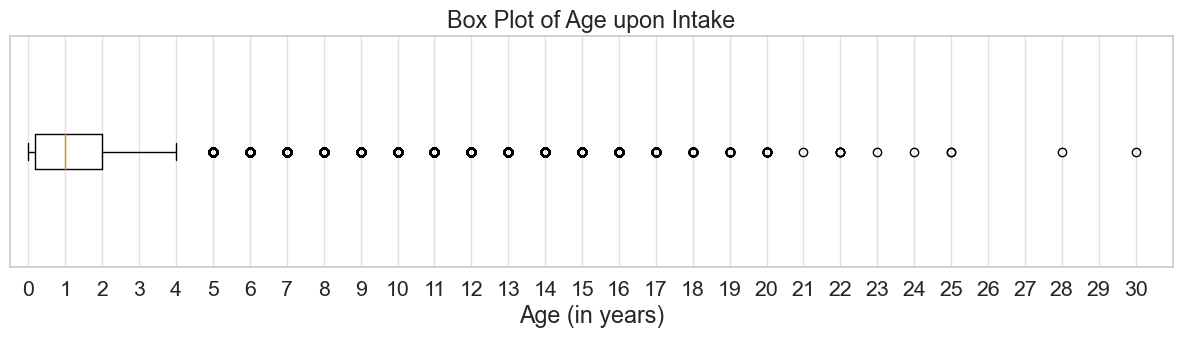

In [1526]:
box_plot(intakes_mod, "Age upon Intake")

In [1527]:
def histplot(df, col):
    fig, ax = plt.subplots(figsize=(12, 6))
    age_bins_custom = range(0, int(df[col].max()))
    # Plotting the histogram with the specified bins
    sns.histplot(
        data=df,
        x=col,
        kde=False,
        bins=age_bins_custom,
        color="lightgreen",
        edgecolor="black",
        ax=ax,
    )
    # Customizing the plot
    ax.set_title(f"Distribution of {col} by Years")
    ax.set_xlabel("Age (in years)")
    ax.set_ylabel("Count")
    ax.grid(axis="y", linestyle="-", alpha=0.6)
    ax.set_xticks(range(0, int(df[col].max()) + 1))
    ax.set_xlim(left=-0.5, right=int(df[col].max()) + 1)
    # Show the plot
    plt.show()

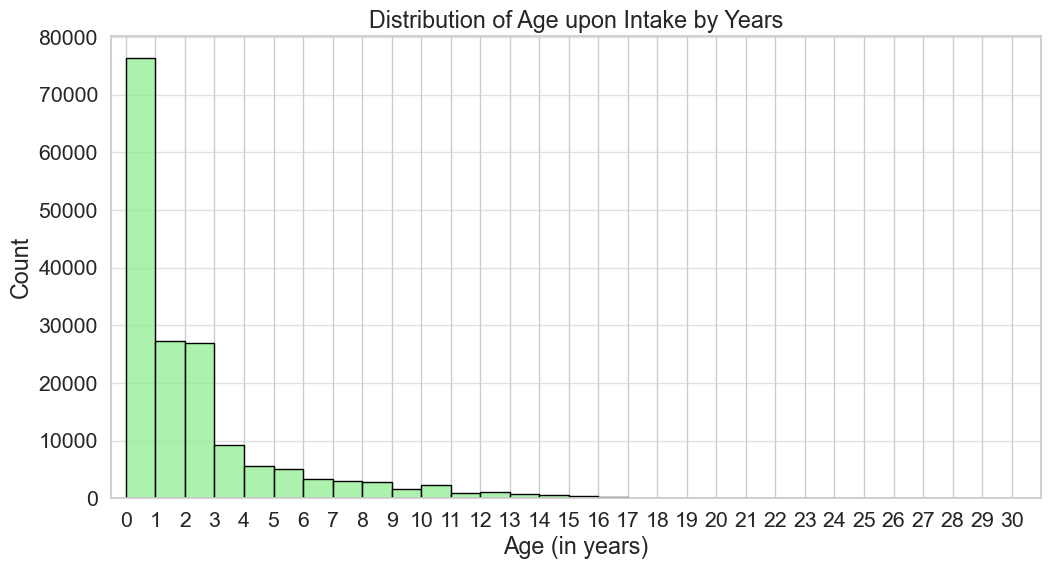

In [1528]:
histplot(intakes_mod, "Age upon Intake")

Každý sloupec zobrazuje interval o délce 1 rok. První sloupec jsou tedy zvířata, jejichž věk byl menší než 1 rok při příjmu.

**DateTime**

In [1529]:
def display_time_stats(df, col):
    stats_df = pd.DataFrame(
        np.array(
            [
                ["Minimal date", df[col].min()],
                ["Maximal date", df[col].max()],
                ["Range", (df[col].max() - df[col].min())],
                ["Median", df[col].median()],
                ["Most frequent month", df[col].dt.month.mode()[0]],
                ["Most frequent weekday", df[col].dt.day_name().mode()[0]],
                ["Most frequent hour", df[col].dt.hour.mode()[0]],
            ]
        ),
        columns=["Title", "Value"],
    )
    display(stats_df)

In [1530]:
display_time_stats(intakes, "DateTime")

,Title,Value
0,Minimal date,2013-10-01 07:51:00
1,Maximal date,2024-10-06 12:31:00
2,Range,4023 days 04:40:00
3,Median,2018-06-06 12:11:00
4,Most frequent month,5
5,Most frequent weekday,Monday
6,Most frequent hour,11


In [1531]:
def histplot_time(col, interval, labels=None):
    fig, ax = plt.subplots(figsize=(13, 7))
    sns.barplot(
        x=col.index,
        y=col.values,
        ax=ax,
        color="b",
        edgecolor="black",
        alpha=0.8,
    )
    if labels is not None:
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=45)
    else:
        ax.set_xticks(range(len(col.index)))
        ax.set_xticklabels(col.index, ha="center")

    ax.set_title(f"Intakes every {interval} over last 10 years")
    ax.set_xlabel(f"{interval}")
    ax.set_ylabel("Number of Intakes")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()

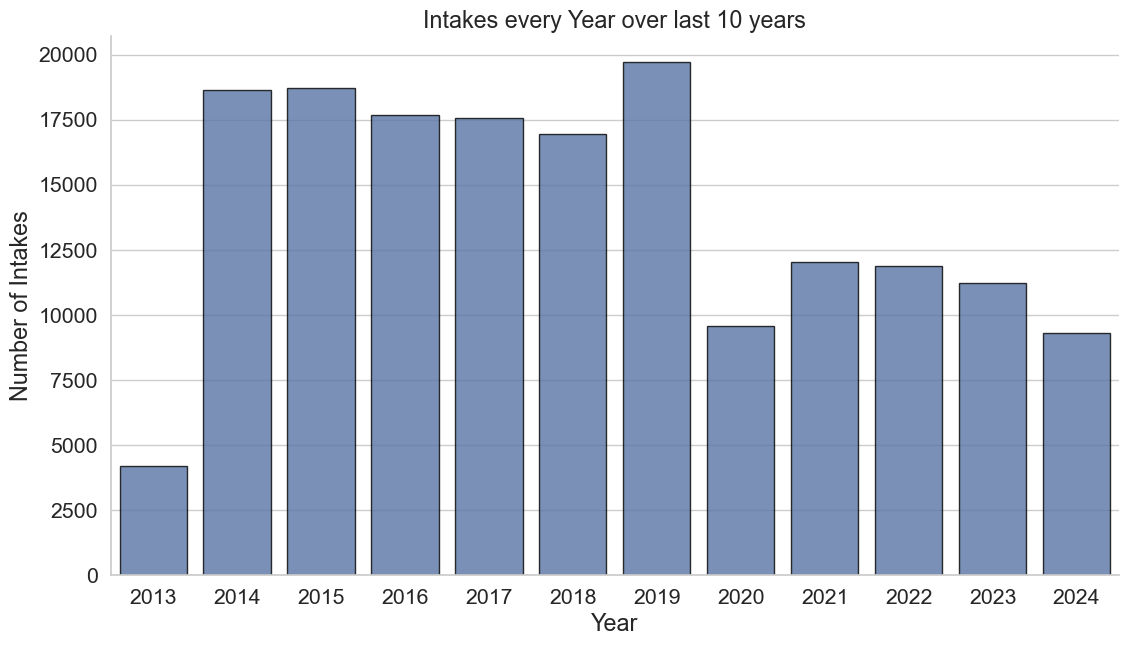

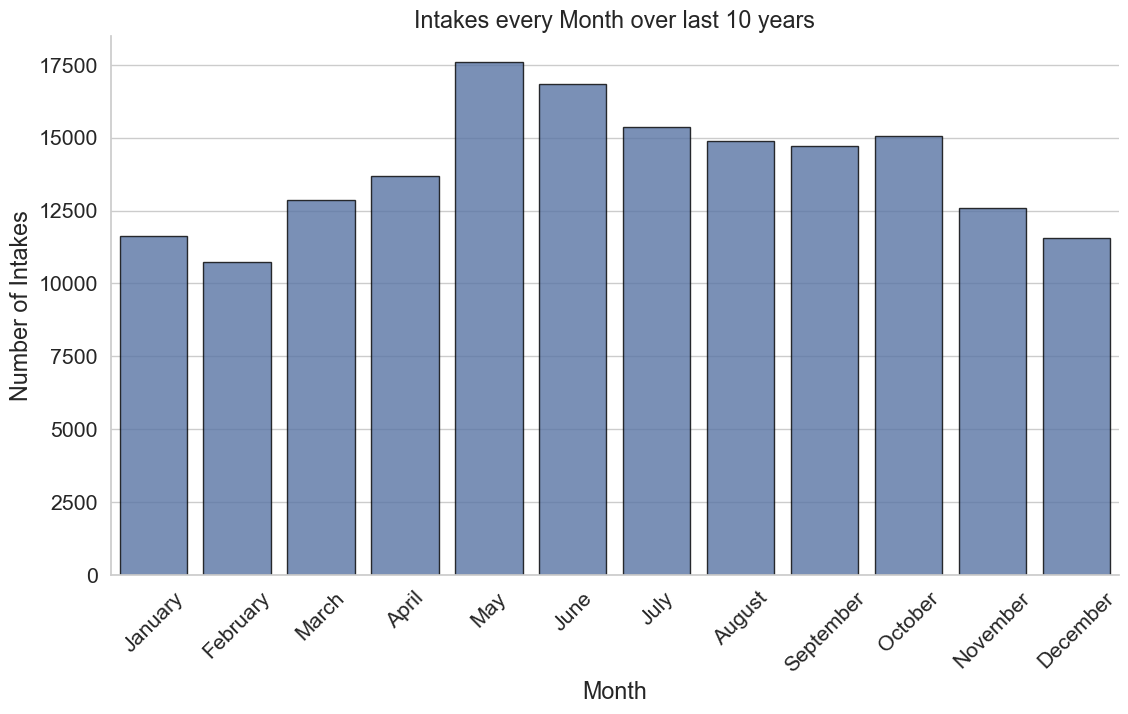

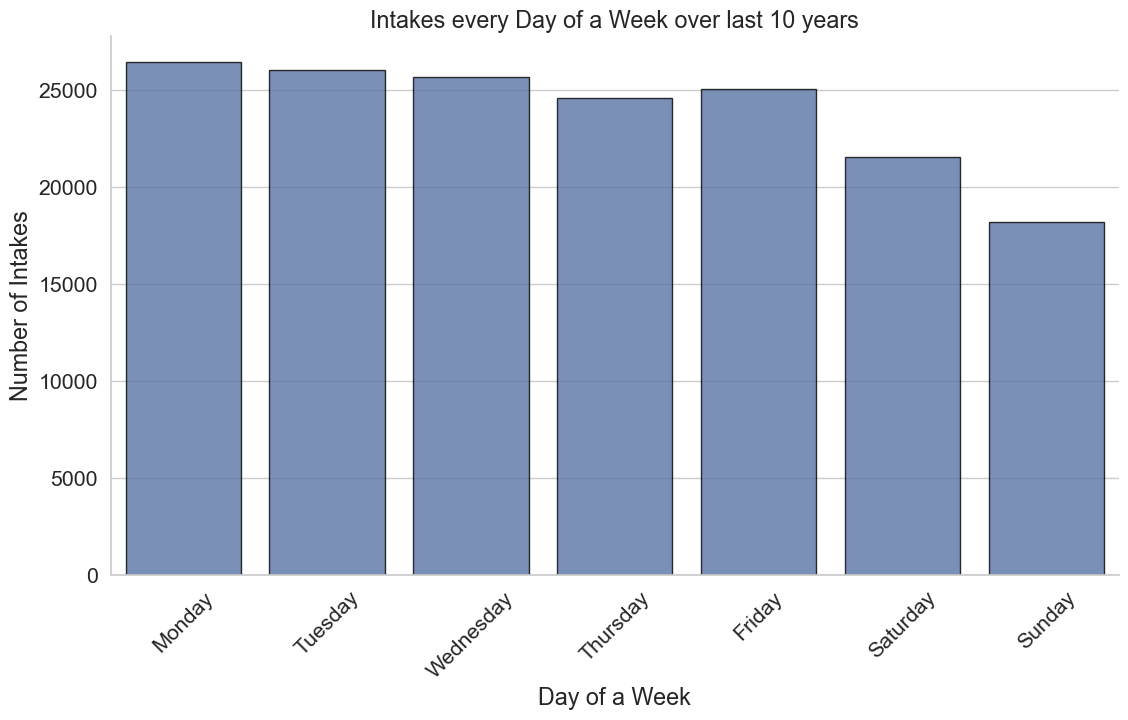

In [1532]:
year_counts = intakes["DateTime"].dt.year.value_counts().sort_index()
month_counts = intakes["DateTime"].dt.month.value_counts().sort_index()
day_counts = intakes["DateTime"].dt.day_of_week.value_counts().sort_index()
month_labels = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
day_labels = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
histplot_time(year_counts, "Year")
histplot_time(month_counts, "Month", month_labels)
histplot_time(day_counts, "Day of a Week", day_labels)

Prvním histogramem můžeme srovnat počty přijímaných zvířat v jednotlivých rocích. V posledních dvou můžeme srovnávat vždy dny v týdnu nebo měsíce v roce, ve kterém bylo za posledních deset let přijmuto nejvíce zvířat.

### Deskriptivní statistiky příznaků Intake Type, Intake Condition, Animal Type

In [1533]:
def showCounts(df, col):
    stats_df = df[col].value_counts().reset_index()
    stats_df.columns = ["Category", "Count"]
    stats_df["Relative Coun %"] = (
        intakes[col].value_counts(normalize=True).values * 100
    ).round(2)
    display(stats_df)

    stats_df.sort_values(by="Count", ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(
        stats_df["Category"], stats_df["Count"], color="lightgreen", edgecolor="black"
    )
    ax.set_ylabel(f"{col}")
    ax.set_xlabel("Counts")
    ax.set_title(f"Counts per {col}")
    ax.set_xticks(np.arange(0, stats_df["Count"].max() + 10000, 10000))
    ax.grid(axis="x", linestyle="-", color="gray", alpha=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(rotation=45)
    plt.show()

,Category,Count,Relative Coun %
0,Stray,114915,68.60
1,Owner Surrender,34330,20.49
2,Public Assist,9995,5.97
3,Wildlife,6284,3.75
4,Abandoned,1738,1.04
5,Euthanasia Request,262,0.16


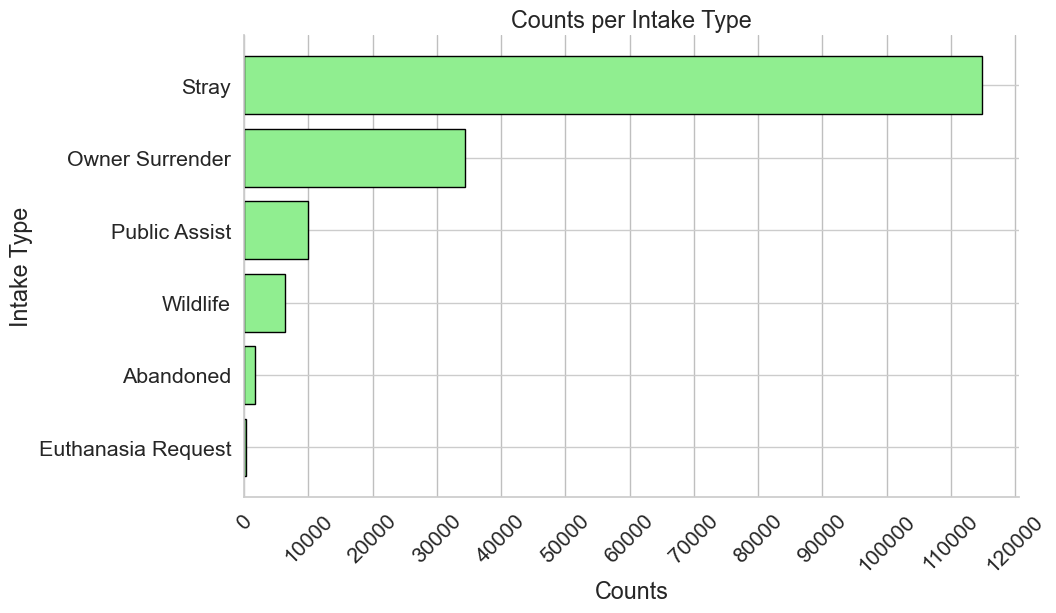

In [1534]:
showCounts(intakes, "Intake Type")

,Category,Count,Relative Coun %
0,Normal,142237,84.92
1,Injured,10243,6.12
2,Sick,7632,4.56
3,Nursing,3878,2.32
4,Neonatal,1712,1.02
5,Aged,517,0.31
6,Medical,462,0.28
7,Other,348,0.21
8,Pregnant,150,0.09
9,Feral,142,0.08


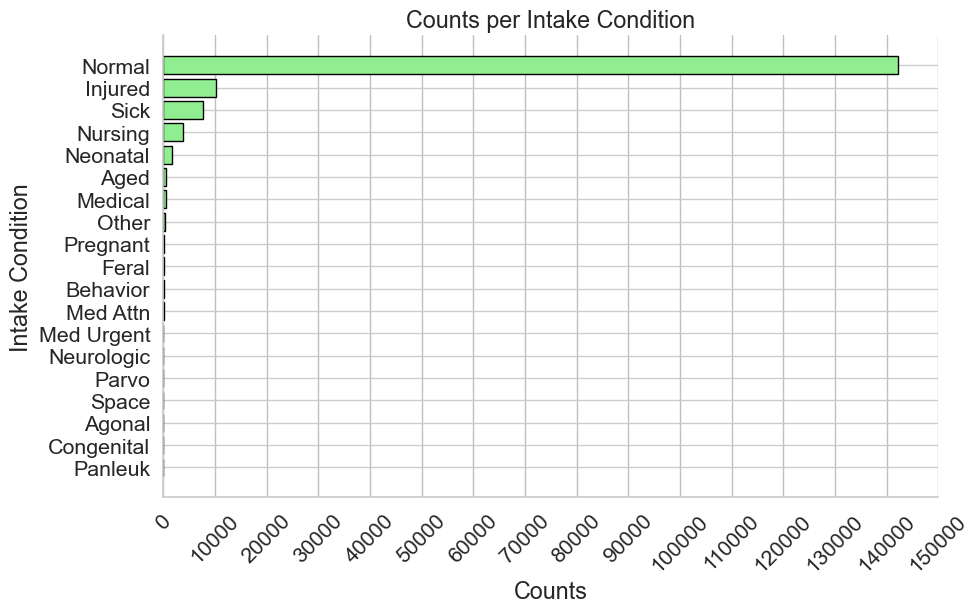

In [1535]:
showCounts(intakes, "Intake Condition")

,Category,Count,Relative Coun %
0,Dog,91631,54.70
1,Cat,66350,39.61
2,Other,8668,5.17
3,Bird,845,0.50
4,Livestock,30,0.02


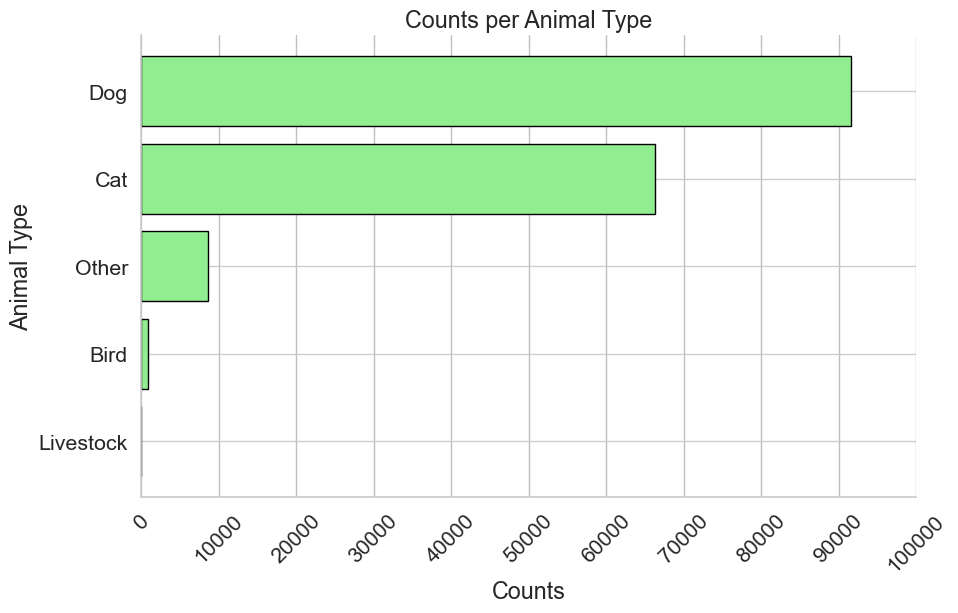

In [1536]:
showCounts(intakes, "Animal Type")

Stanice za posledních 10 let přijímala hlavně psy a kočky. Většina z nich byla v normálním stavu. Většina zvířat se do útulku dostala jako zatoulaná.

### Bivariační statistika mezi příznaky

Popíšu jak spolu souvisí sterilizace a Intake Type. Obojí jsou kategorické příznaky, proto si vytvořím funkci, která vykreslí kontigenční tabulky vizualizující počty zvířat v jednotlivých kombinacích kategorií.

In [1537]:
def crosstable(df, cat1, cat2):
    count_table = pd.crosstab(df[cat1], df[cat2])
    freq_table = pd.crosstab(df[cat1], df[cat2], normalize=True)
    fig, axes = plt.subplots(
        2, 1, figsize=((df[cat2].nunique() * 4), df[cat1].nunique() * 2)
    )
    sns.set(font_scale=1.4)

    sns.heatmap(
        count_table,
        cmap="Reds",
        annot=True,
        vmin=0,
        vmax=len(df.dropna()),
        fmt="g",
        ax=axes[0],
        annot_kws={"size": df[cat1].nunique() * 2},
    )
    sns.heatmap(
        freq_table * 100,
        vmin=0,
        vmax=100,
        cmap="Reds",
        annot=True,
        fmt=".4f",
        ax=axes[1],
        annot_kws={"size": df[cat1].nunique() * 2},
    )
    fig.suptitle(f"Contingency tables of {cat1} and {cat2}")
    axes[0].set_title(f"Absolute Counts")
    axes[0].set_xlabel(cat2)
    axes[0].set_ylabel(cat1)

    axes[1].set_xlabel(cat2)
    axes[1].set_ylabel(cat1)
    axes[1].set_title(f"Relative Frequencies (%)")
    plt.tight_layout(pad=3.0)

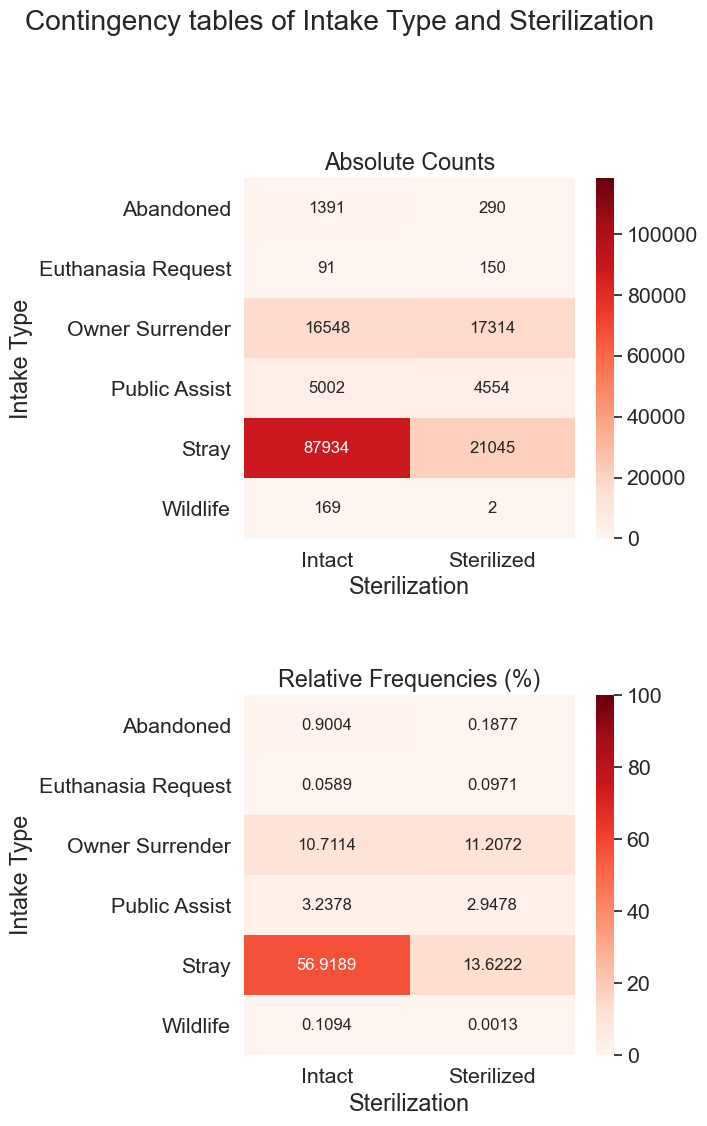

In [1538]:
crosstable(intakes, "Intake Type", "Sterilization")

Z grafu je vidět, že většina zatoulaných zvířet je kastrací neprošla, stejně tak (nepřekvapivě) i zvěř. Naopak více sterilizovaných zvířat než nesterilizovaných je v případě, že majitel zvíře odevzdal (i když ne nijak výrazně).

## Zadané otázky

1. Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?
2. Hraje věk zvířete roli při adopci?
3. Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

### 1. Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

In [1539]:
# vezmu z datasetu intakes, unikatni zvirata, udelam full outer join podle Animal ID
df1 = intakes[intakes.duplicated("Animal ID", keep="first") == False]
df2 = outcomes[outcomes.duplicated("Animal ID", keep="first") == False]
result = pd.merge(df1, df2, on="Animal ID", how="outer", suffixes=("_in", "_out"))
result.head()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151375 entries, 0 to 151374
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Animal ID          151375 non-null  object        
 1   Name_in            102795 non-null  object        
 2   DateTime_in        150561 non-null  datetime64[ns]
 3   Found Location     150561 non-null  object        
 4   Intake Type        150561 non-null  category      
 5   Intake Condition   150536 non-null  category      
 6   Animal Type_in     150561 non-null  category      
 7   Age upon Intake    150554 non-null  float64       
 8   Breed_in           150558 non-null  category      
 9   Color_in           150560 non-null  category      
 10  Sterilization_in   137538 non-null  category      
 11  Sex_in             137538 non-null  category      
 12  Name_out           102927 non-null  object        
 13  DateTime_out       150558 non-null  datetime

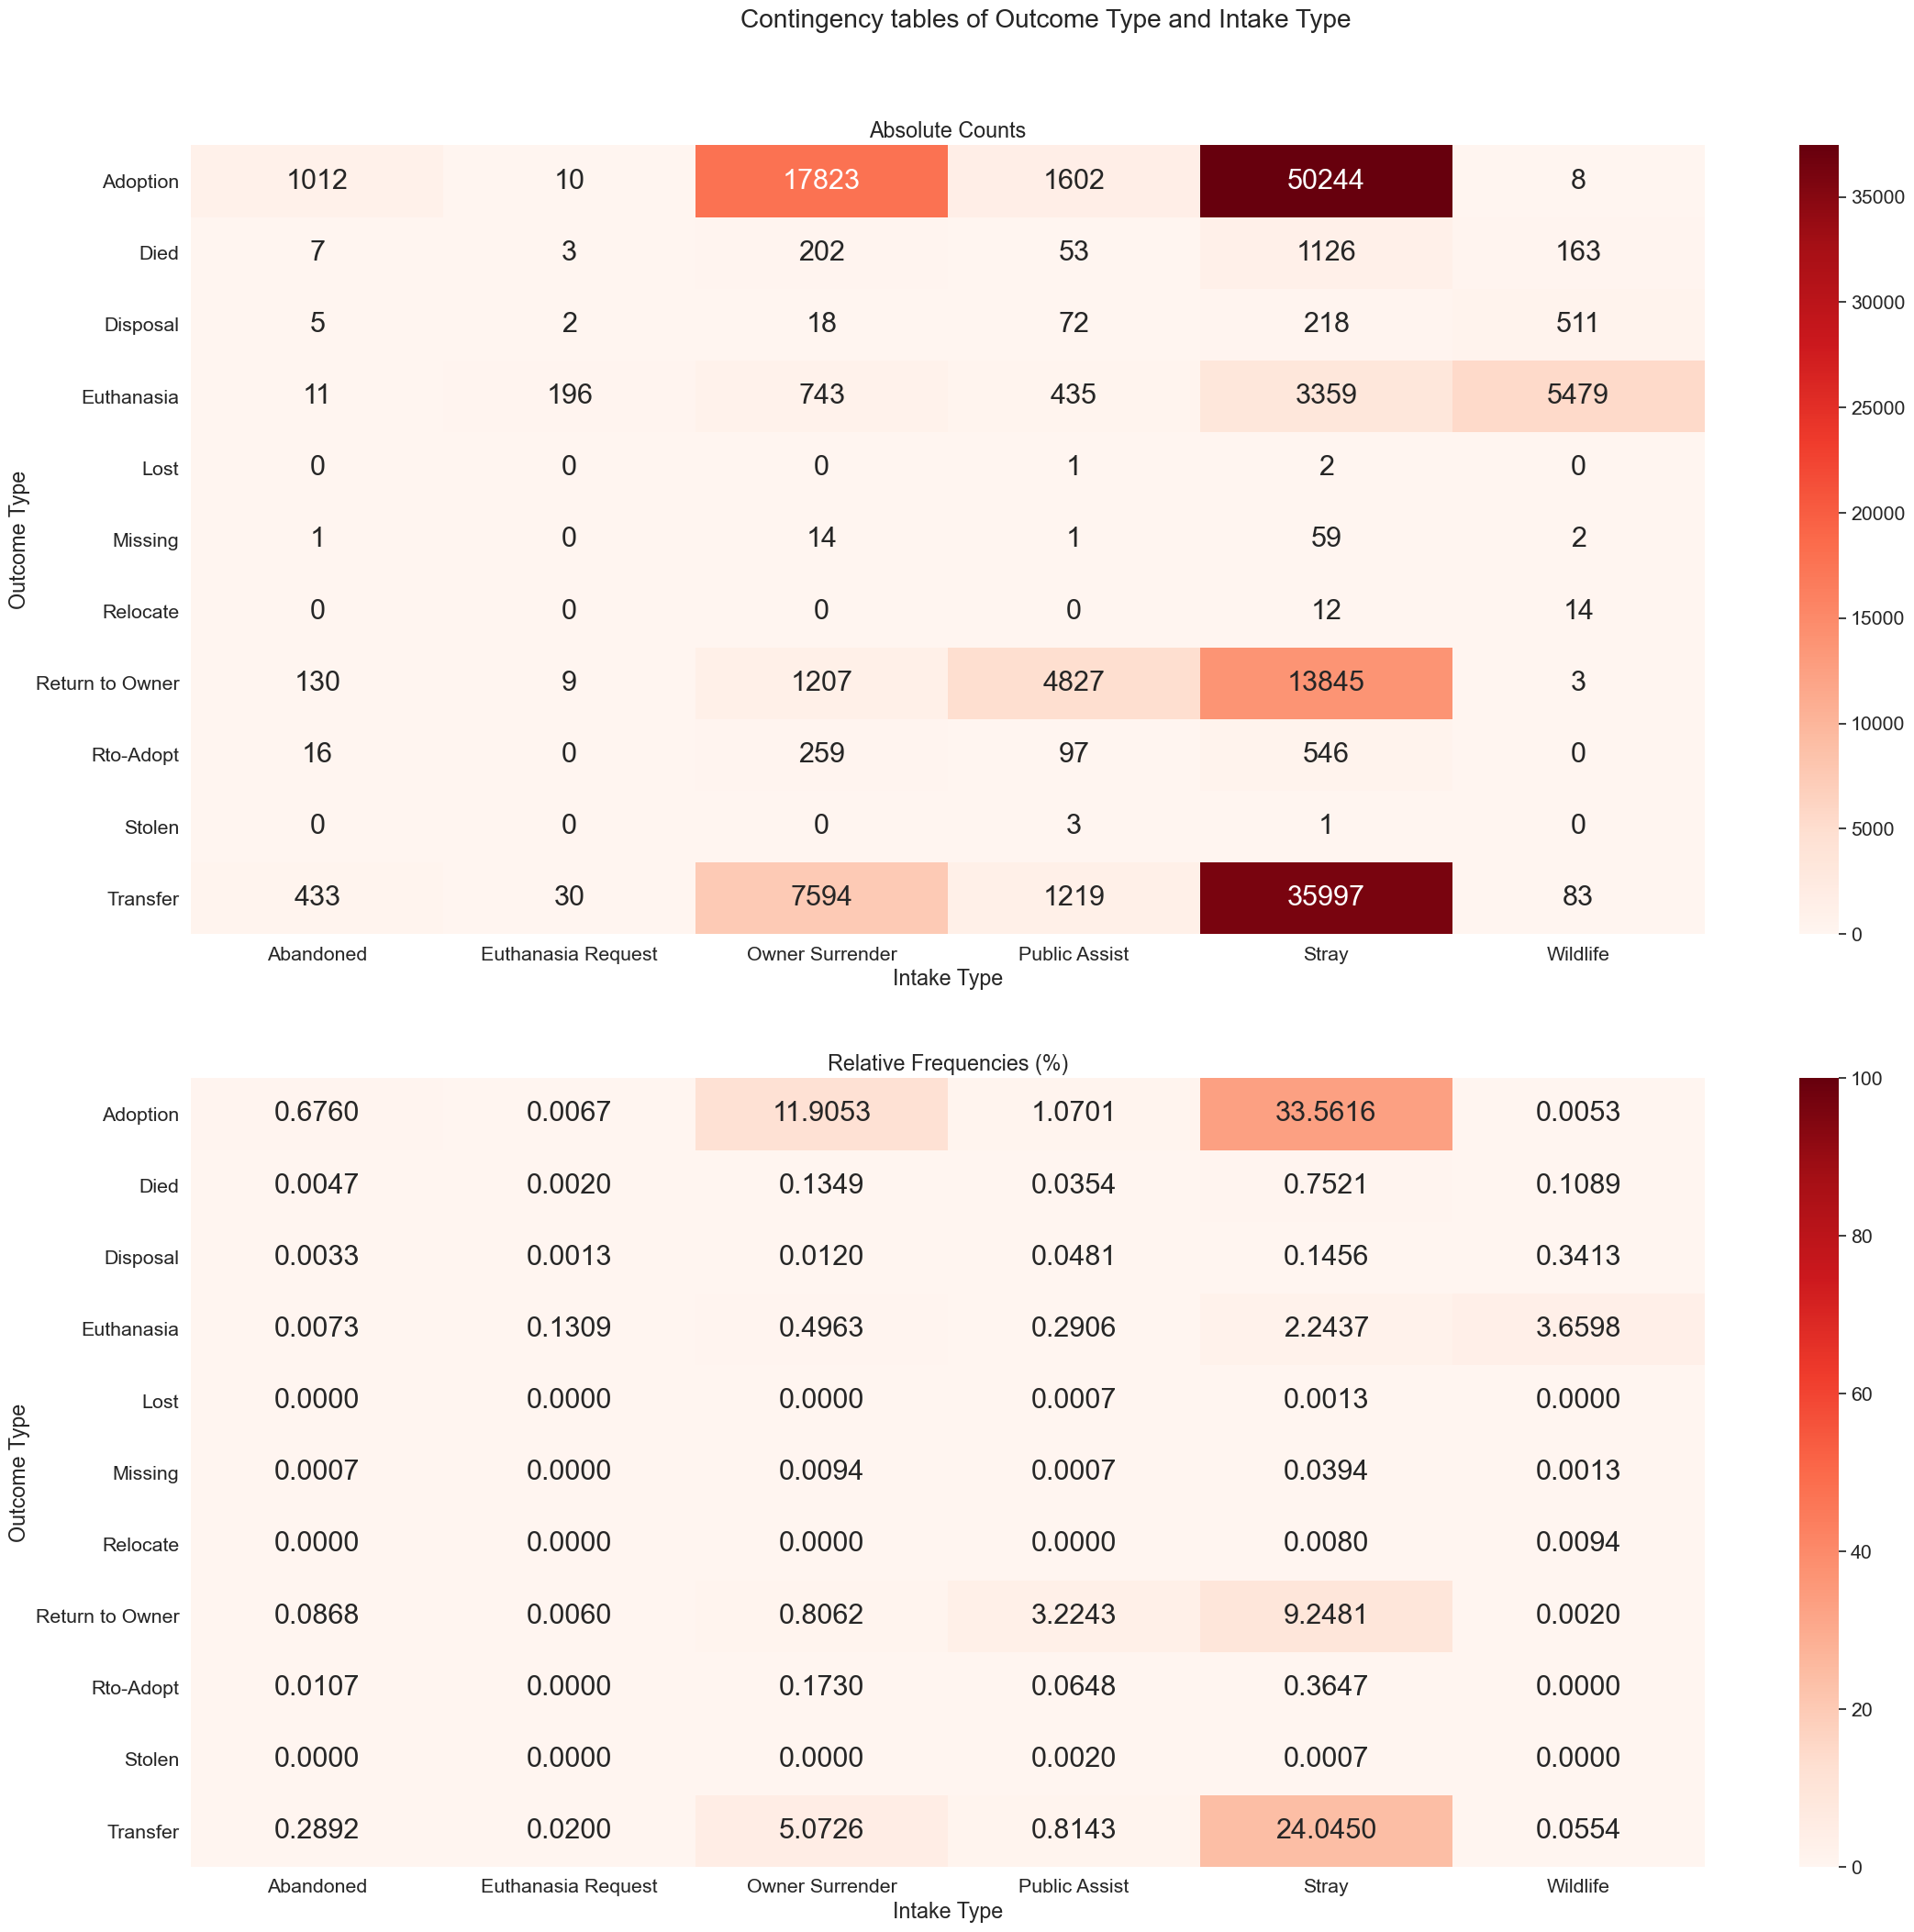

In [1540]:
crosstable(result, "Outcome Type", "Intake Type")

Ano, závisí, např pokud zvíře bylo opuštěné, tak z útulku odešlo s nejpravděpodobněji adopcí a nebo přesunem do jiného útulku. Naopak pokud se jednalo o divoké zvíře tak pravděpodobně podstoupilo eutanázii a pokud někdo z veřejnosti zvíře donesl do útulku, tak se zvíře nejspíš vrátilo majiteli.

Z heatmapy je vidět, že spolu přiznaky Outcome Type a Intake Type závisí. Distribuce není rovnoměrná.

### 2. Hraje věk zvířete roli při adopci?


Vytvořím nový binární příznak Adoption, kde True == Adoption je v sloupci Outcome Type, jinak False. Příznak Years, kde převedu hodnotu věku, která je ve dnech, na roky. Výsledné grafy budou tak přehlednější a čitelnější.

In [1541]:
outcomes["Adoption"] = outcomes["Outcome Type"] == "Adoption"
outcomes["Years"] = outcomes["Age upon Outcome"] / 365
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   Date of Birth     167535 non-null  object        
 4   Outcome Type      167491 non-null  category      
 5   Outcome Subtype   76957 non-null   category      
 6   Animal Type       167535 non-null  category      
 7   Age upon Outcome  167479 non-null  float64       
 8   Breed             167532 non-null  category      
 9   Color             167534 non-null  category      
 10  Sterilization     154532 non-null  category      
 11  Sex               154532 non-null  category      
 12  Adoption          167535 non-null  bool          
 13  Years             167479 non-null  float64       
dtypes: b

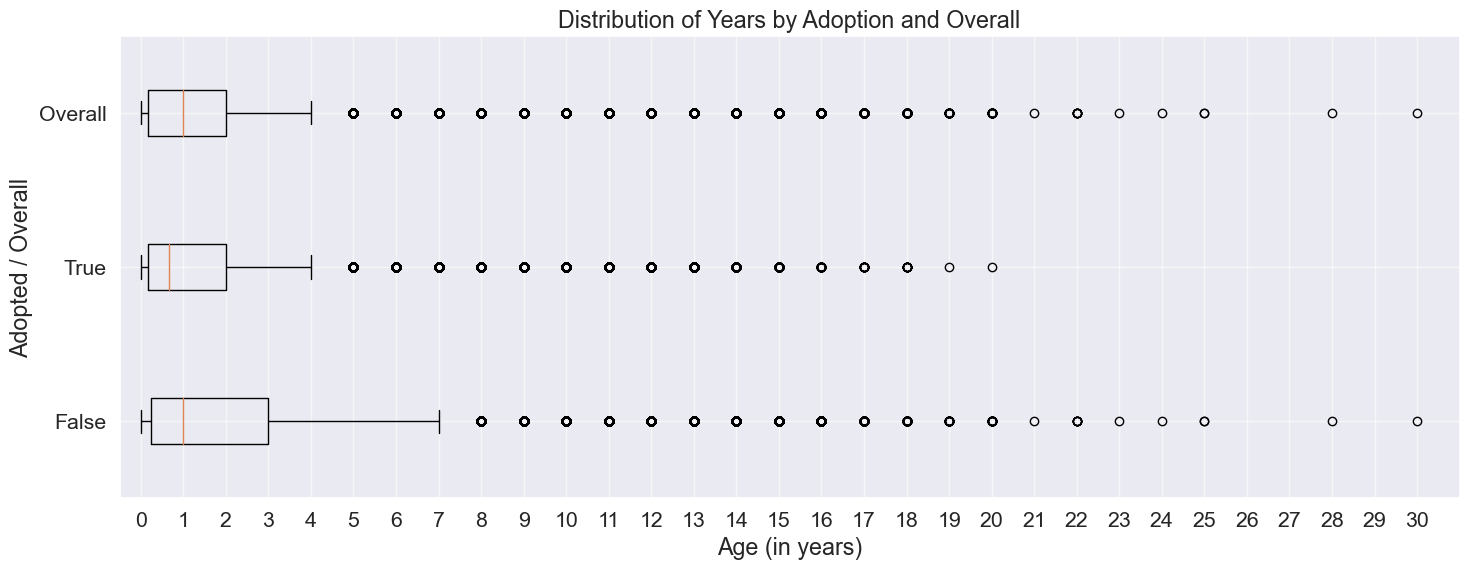

In [1542]:
def box_plot2(df, outcome_col, age_col):

    age_data = [
        df[df[outcome_col] == outcome][age_col].dropna() for outcome in [False, True]
    ]

    fig, ax = plt.subplots(figsize=(15, 6))

    ax.boxplot(
        age_data + [df[age_col].dropna()], vert=False, labels=[False, True, "Overall"]
    )
    ax.set_title(f"Distribution of {age_col} by {outcome_col} and Overall")
    ax.set_xlabel("Age (in years)")
    ax.set_ylabel("Adopted / Overall")
    ax.grid(visible=True, linestyle="-", alpha=0.6)

    # Set x-axis limits and ticks
    ax.set_xticks(range(0, int(df[age_col].max()) + 1))
    ax.set_xlim(left=-0.5, right=int(df[age_col].max()) + 1)

    plt.tight_layout()
    plt.show()


box_plot2(outcomes, "Adoption", "Years")

Z krabicového grafu je vidět, že adoptovaná zvířata mají medián věku nižší ve srovnání se všemi ostatními zvířaty opouštějící útulek. 

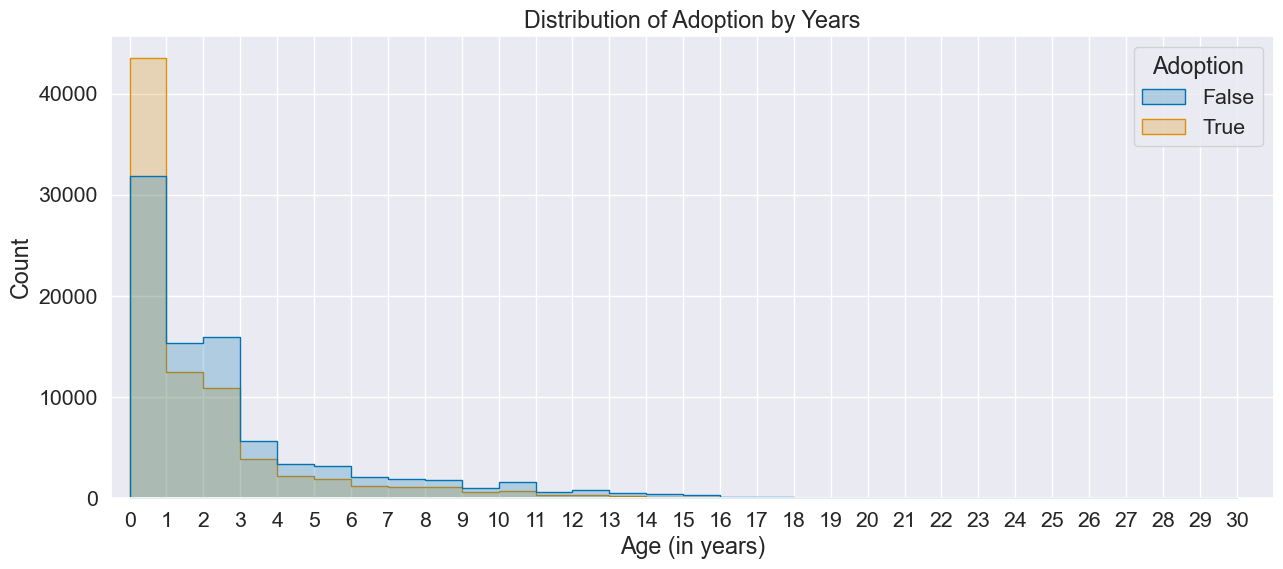

In [1543]:
def histplot2(df, cat_col, age_col):
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(15, 6))

    palette = sns.color_palette("colorblind", df[cat_col].nunique())
    sns.set_palette(palette)

    sns.histplot(
        data=df,
        x=age_col,
        hue=cat_col,
        element="step",
        palette=palette[: df[cat_col].nunique()],
        ax=ax,
        bins=range(0, int(df[age_col].max()) + 1),
    )

    ax.set_title(f"Distribution of {cat_col} by {age_col}")
    ax.set_xlabel("Age (in years)")
    ax.set_ylabel("Count")
    ax.set_xticks(range(0, int(df[age_col].max()) + 1))
    ax.set_xlim(left=-0.5, right=int(df[age_col].max()) + 1)
    plt.show()


histplot2(outcomes, "Adoption", "Years")

Vidíme, že s přibývajícím věkem odcházejícího zvířete převažuje opuštění útulku jiným způsobem než adopcí.

In [1544]:
outcomes.drop("Adoption", axis=1)
outcomes.drop("Years", axis=1)

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Age upon Outcome,Breed,Color,Sterilization,Sex,Adoption
0,A882831,*Hamilton,2023-07-01 18:12:00,03/25/2023,Adoption,NaN,Cat,90.0,Domestic Shorthair Mix,Black/White,Sterilized,Male,True
1,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,NaN,Cat,730.0,Domestic Shorthair Mix,Brown Tabby/White,Sterilized,Male,False
2,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,365.0,Chihuahua Shorthair Mix,White/Brown,Sterilized,Male,True
3,A821648,NaN,2020-08-16 11:38:00,08/16/2019,Euthanasia,NaN,Other,365.0,Raccoon,Gray,NaN,NaN,False
4,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,NaN,Dog,120.0,Anatol Shepherd/Labrador Retriever,Buff,Sterilized,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167554,A914585,NaN,2024-10-06 16:21:00,10/03/2022,Euthanasia,Rabies Risk,Other,730.0,Raccoon,Gray/White,NaN,NaN,False
167555,A914548,NaN,2024-10-03 13:18:00,10/02/2022,Transfer,Partner,Dog,730.0,Labrador Retriever,Cream,Intact,Female,False
167556,A914369,NaN,2024-10-06 11:23:00,09/30/2022,Disposal,NaN,Cat,730.0,Domestic Shorthair,Gray/White,Intact,Female,False
167557,A722952,Guero,2024-10-06 11:51:00,03/24/2014,Rto-Adopt,NaN,Dog,3650.0,American Pit Bull Terrier Mix,Tan/White,Sterilized,Male,False


### 3. Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

Nejprve se podívám jak byly vyttížené jednotlivé měsíce za posledních 10 let. K tomu využiji grafy z předchozích částí úkolů.

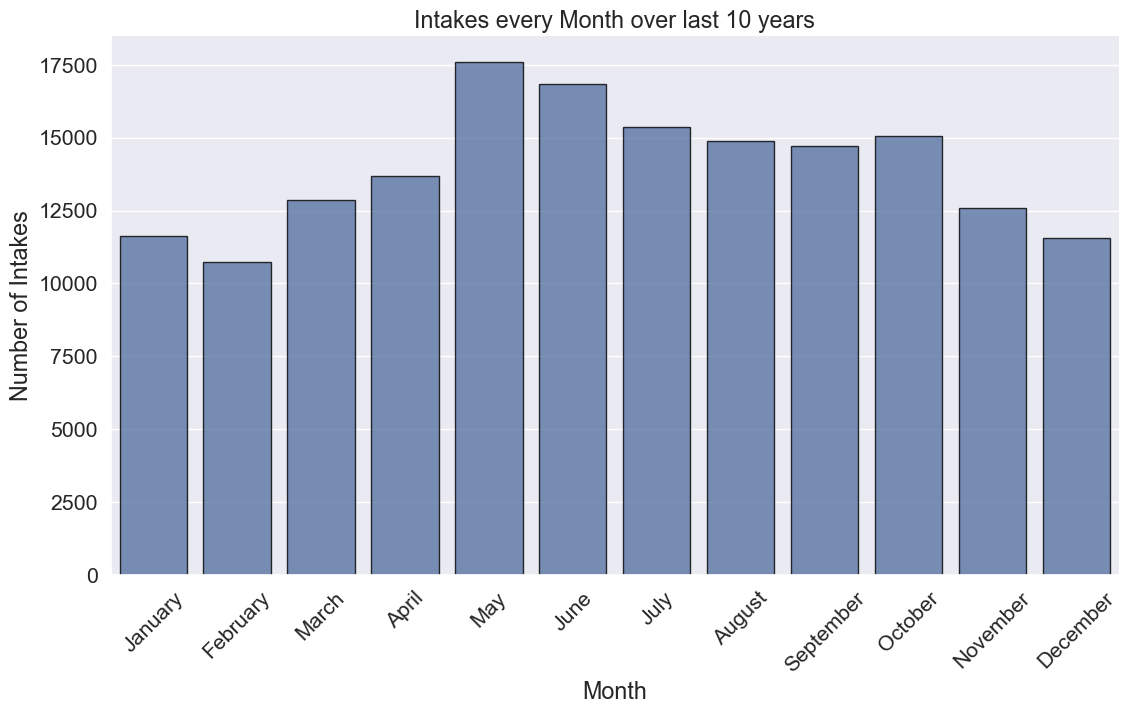

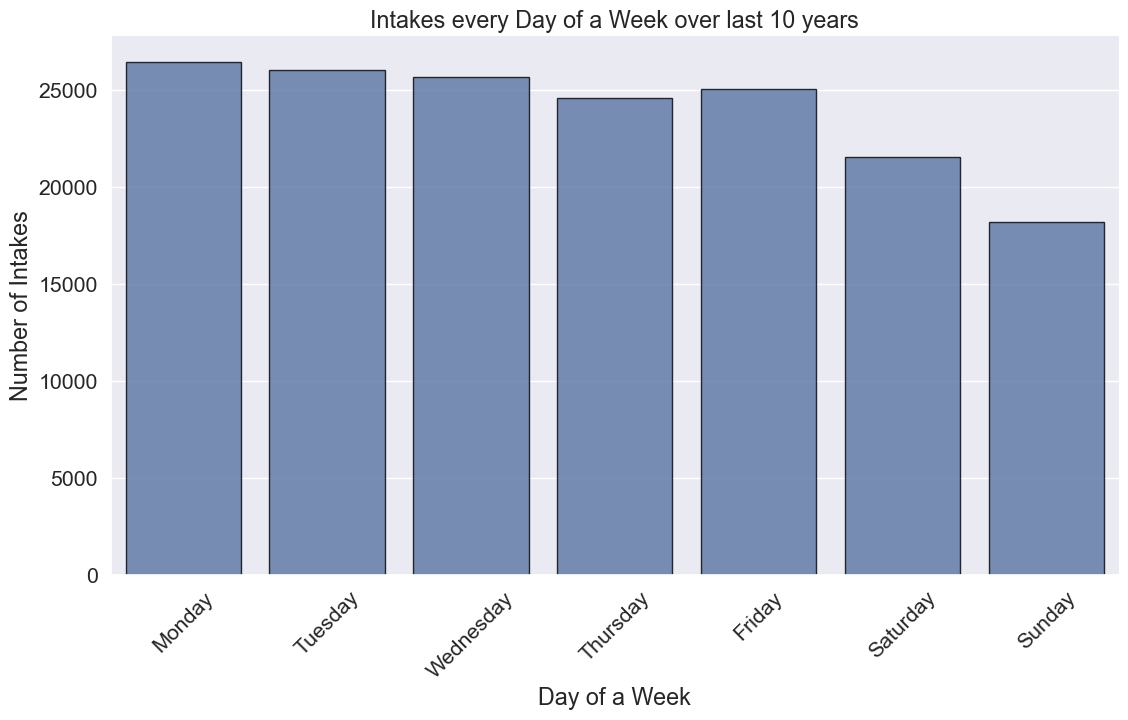

In [1545]:
month_counts = intakes["DateTime"].dt.month.value_counts().sort_index()
day_counts = intakes["DateTime"].dt.day_of_week.value_counts().sort_index()
month_labels = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
day_labels = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

histplot_time(month_counts, "Month", month_labels)
histplot_time(day_counts, "Day of a Week", day_labels)

Z grafů vidíme, že stanice v zimě (prosinec - únor) přijímá méně zvířat než v létě. V rámci pracovního týdne je to více vyrovnané. O víkendech je příjem menší než v pracovním týdnu.

Zkusím vizalizovat, pomocí heatmapy, vytíženost skrz všechny dny a měsíce v roce.

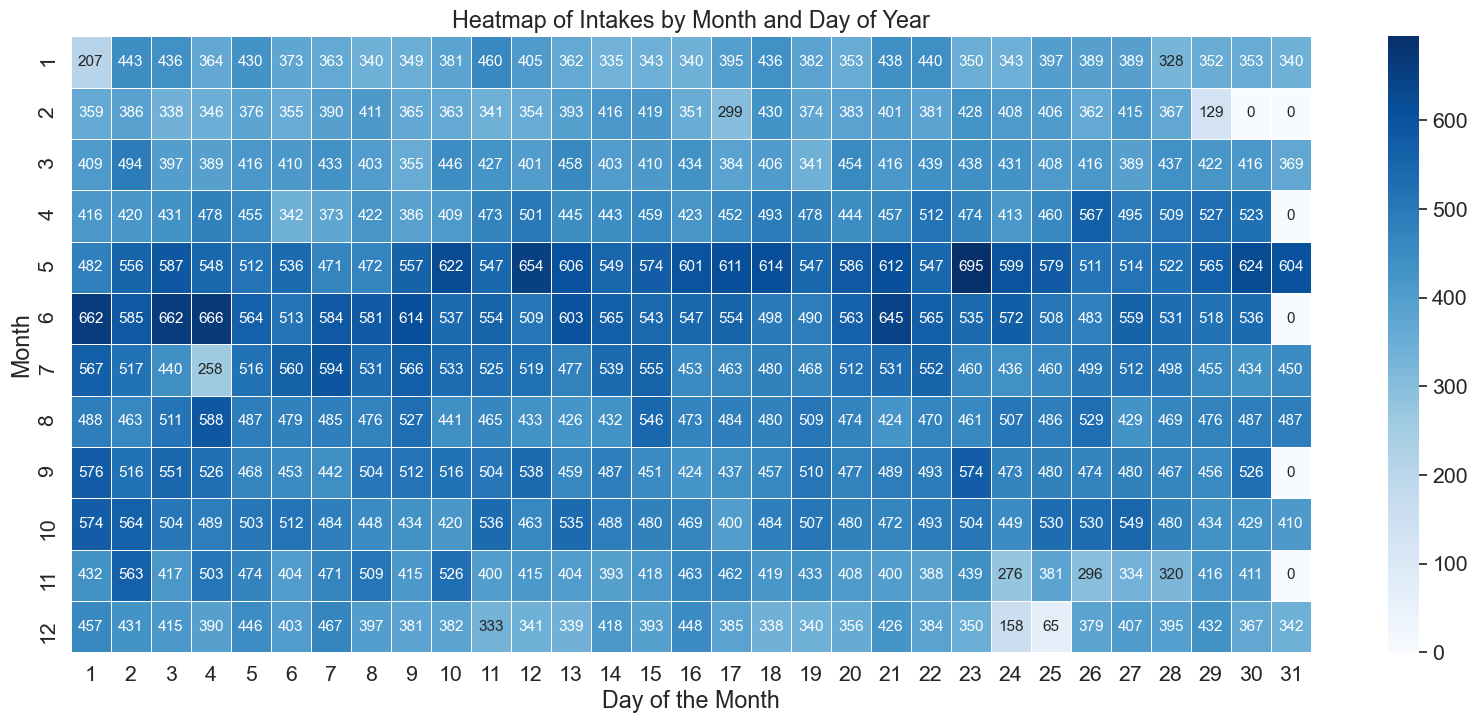

In [1546]:
monthDay = pd.DataFrame()
monthDay["Month"] = intakes["DateTime"].dt.month
monthDay["Day"] = intakes["DateTime"].dt.day

pivot_table = monthDay.pivot_table(
    index="Month", columns="Day", aggfunc="size", fill_value=0
)  # kontingecni tabulka

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(
    pivot_table,
    ax=ax,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt="d",
    annot_kws={"size": 11},
)

ax.set_xlabel("Day of the Month")
ax.set_ylabel("Month")
ax.set_title("Heatmap of Intakes by Month and Day of Year")

plt.show()

Nejvytíženější období v roce, za posledních deset let, je konec květen, a začátek června. Nejvytížinější den je 23. 5. 

Nejméně vytížené dny:
- 25.12. Vánoce 
- 24.12 Vánoce
- 1.1. Nový rok
- 4.7. Den nezávisloti

## Vlastní otázky